Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [107]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/ivamaria/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['maximum']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [108]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [109]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [110]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

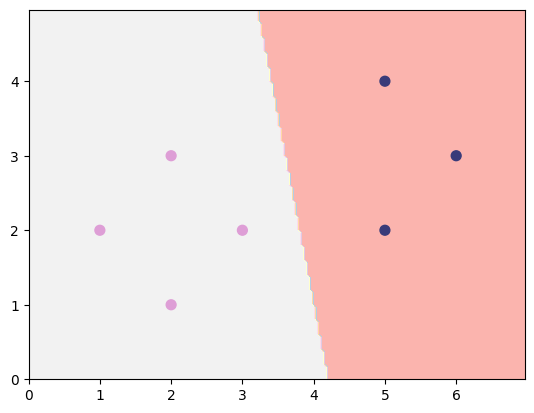

Točnost klasifikacijskog modela: 1.00


In [111]:
ridgeClassifier = RidgeClassifier(alpha=0.0)
ridgeClassifier.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, ridgeClassifier.predict)
plt.show()

print("Točnost klasifikacijskog modela: {0:.2f}".format(accuracy_score(seven_y, ridgeClassifier.predict(seven_X))))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

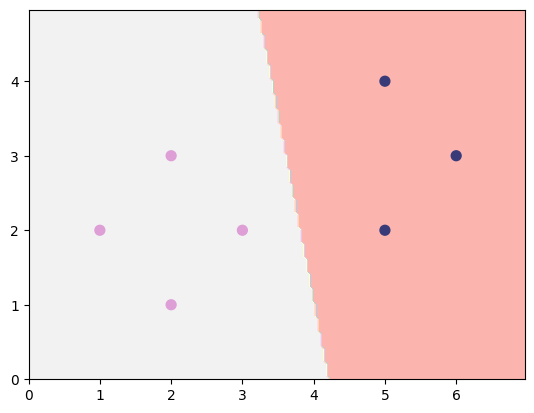

Točnost klasifikacijskog modela: 1.00


In [112]:
linearRegression = LinearRegression()
linearRegression.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x : linearRegression.predict(x) >= 0.5)
plt.show()

print("Točnost klasifikacijskog modela: {0:.2f}".format(accuracy_score(seven_y, [1 if x >= 0.5 else 0 for x in linearRegression.predict(seven_X)])))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [113]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

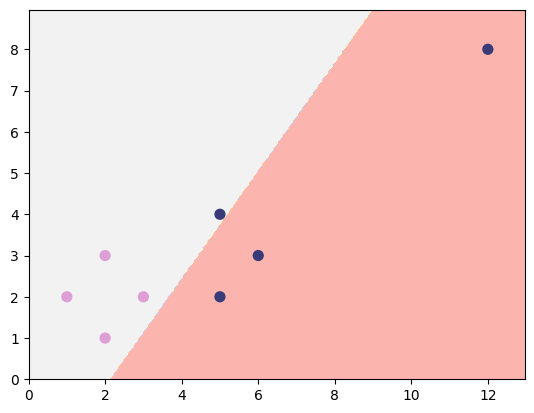

Točnost klasifikacijskog modela: 0.88


In [114]:
ridgeClassifier = RidgeClassifier(alpha=0.0)
ridgeClassifier.fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, ridgeClassifier.predict)
plt.show()

print("Točnost klasifikacijskog modela: {0:.2f}".format(accuracy_score(outlier_y, ridgeClassifier.predict(outlier_X))))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [115]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

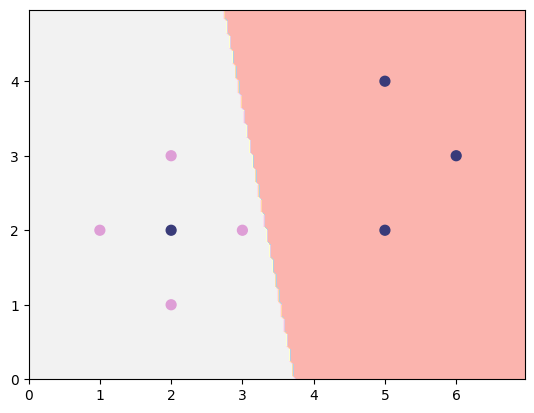

Točnost klasifikacijskog problema: 0.88


In [116]:
ridgeClassifier = RidgeClassifier(alpha=0.0)
ridgeClassifier.fit(unsep_X, unsep_y)

plot_2d_clf_problem(unsep_X, unsep_y, ridgeClassifier.predict)
plt.show()

print("Točnost klasifikacijskog problema: {0:.2f}".format(accuracy_score(unsep_y, ridgeClassifier.predict(unsep_X))))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

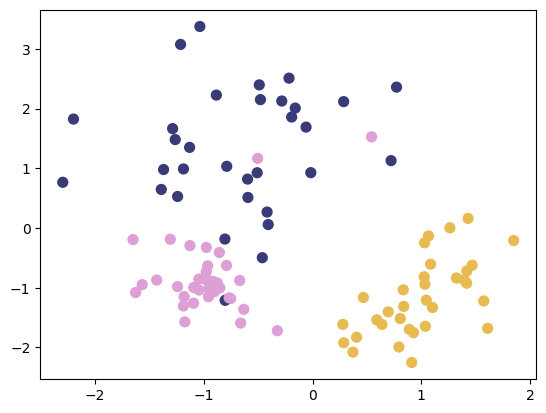

In [117]:
from sklearn.datasets import make_classification

multiclass_X, multiclass_y = make_classification(n_features=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)

plot_2d_clf_problem(multiclass_X, multiclass_y)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

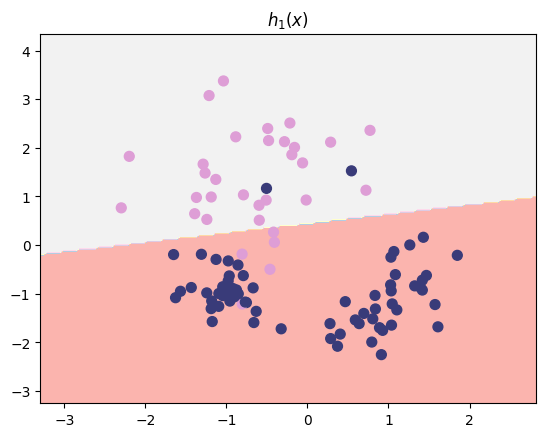

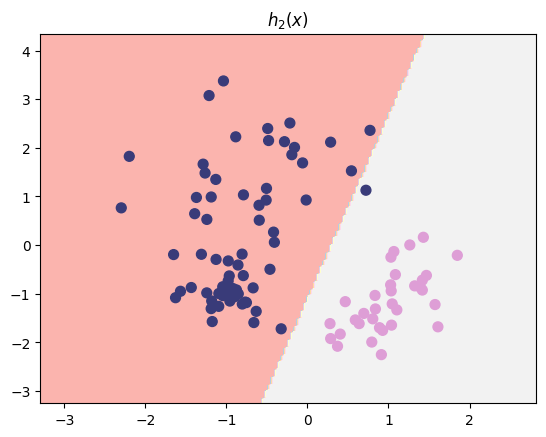

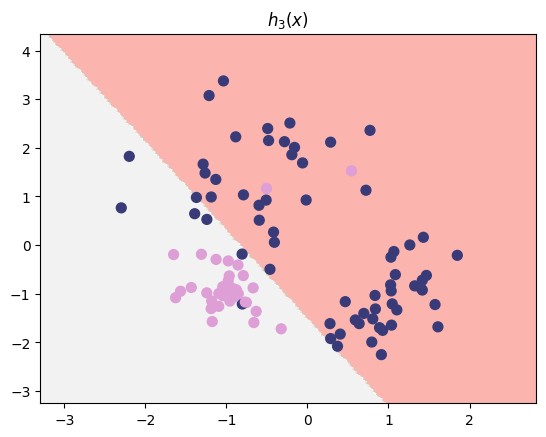

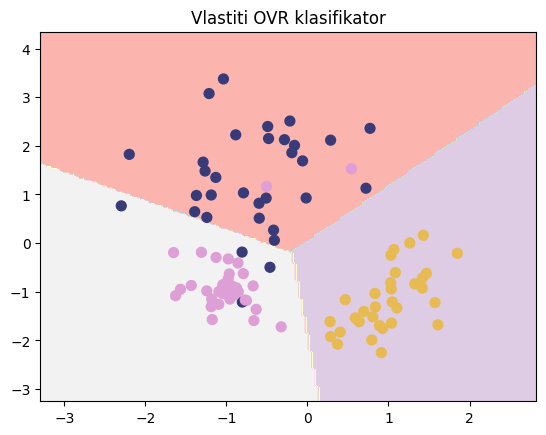

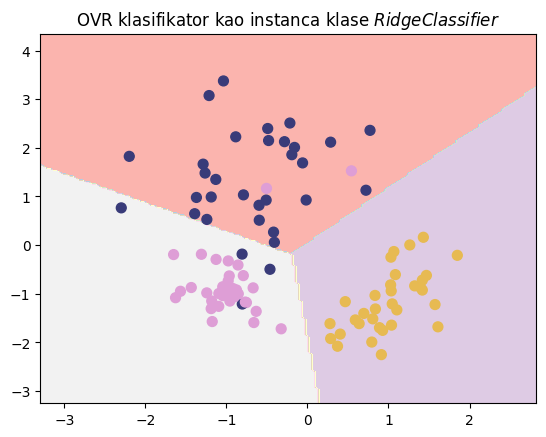

In [118]:
# argmax h(x) funkcija
def predict(x):
    h1 = linearRegression_1.predict(x)
    h2 = linearRegression_2.predict(x)
    h3 = linearRegression_3.predict(x)

    h = h1.copy()

    for i in range(h.shape[0]):
        h[i] = maximum(h1[i], h2[i], h3[i])

    return h

# Pomocna funkcija za argmax h(x)
def maximum(x1, x2, x3):
    if(x1 >= x2 and x1 >= x3):
        return 0
    elif(x2 >= x1 and x2 >= x3):
        return 1
    else:
        return 2

# Inicijaliziraj vektore oznaka.
y_1 = multiclass_y.copy()
y_2 = multiclass_y.copy()
y_3 = multiclass_y.copy()

for i in range(multiclass_y.shape[0]):
    if(multiclass_y[i] == 0):
        y_1[i] = 1
        y_2[i] = 0
        y_3[i] = 0
    elif(multiclass_y[i] == 1):
        y_1[i] = 0
        y_2[i] = 1
        y_3[i] = 0
    elif(multiclass_y[i] == 2):
        y_1[i] = 0
        y_2[i] = 0
        y_3[i] = 1

# OVR za klasu 1
linearRegression_1 = LinearRegression()
linearRegression_1.fit(multiclass_X, y_1)
plot_2d_clf_problem(multiclass_X, y_1, lambda x : linearRegression_1.predict(x) >= 0.5)
plt.title("$h_1(x)$")
plt.show()

# OVR za klasu 2
linearRegression_2 = LinearRegression()
linearRegression_2.fit(multiclass_X, y_2)
plot_2d_clf_problem(multiclass_X, y_2, lambda x : linearRegression_2.predict(x) >= 0.5)
plt.title("$h_2(x)$")
plt.show()

# OVR za klasu 3
linearRegression_3 = LinearRegression()
linearRegression_3.fit(multiclass_X, y_3)
plot_2d_clf_problem(multiclass_X, y_3, lambda x : linearRegression_3.predict(x) >= 0.5)
plt.title("$h_3(x)$")
plt.show()

# OVR pomocu vlastite klase
plot_2d_clf_problem(multiclass_X, multiclass_y, lambda x: predict(x))
plt.title("Vlastiti OVR klasifikator")
plt.show()

# OVR pomocu RidgeClassifier
ridgeClassifier = RidgeClassifier(alpha=0.0)
ridgeClassifier.fit(multiclass_X, multiclass_y)
plot_2d_clf_problem(multiclass_X, multiclass_y, lambda x: ridgeClassifier.predict(x))
plt.title("OVR klasifikator kao instanca klase $RidgeClassifier$")
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

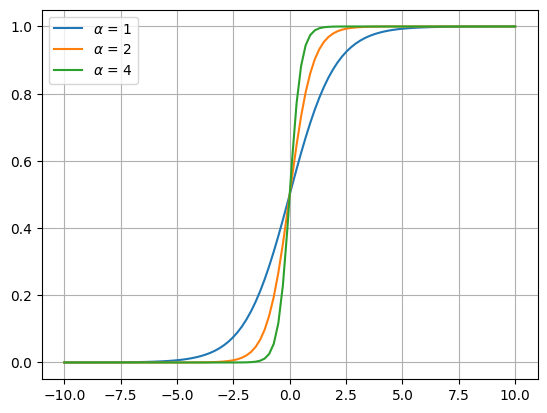

In [119]:
def sigm(x, alpha=1):
    return 1 / (1 + np.exp(- 1 * alpha * x))

alphas = [1, 2, 4]
X = np.linspace(-10, 10, 100)

for alpha in alphas:
    s = sigm(X, alpha)
    plt.plot(X, s, label="$\u03B1$ = {}".format(alpha))

plt.legend()
plt.grid()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [120]:
from sklearn.preprocessing import PolynomialFeatures

def cross_entropy_error(X, y, w):
    return np.mean((- y * np.log(lr_h(X, w)) - (1 - y) * np.log(1 - lr_h(X, w))))

def lr_h(x, w):
    if(x.ndim == 1):
        return sigm(PolynomialFeatures(1).fit_transform(x.reshape(1, -1)).dot(w))
    else:
        return sigm(PolynomialFeatures(1).fit_transform(x).dot(w))

def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace = False):

    #Inicijaliziraj trace listu svih vektora tezina.
    w_trace = []

    w_prev = np.zeros(X.shape[1] + 1)   
    err = cross_entropy_error(X, y, w_prev) * X.shape[0]
    
    iter = 0
    while(iter < max_iter and err >= epsilon):

        # Inicijaliziraj vektor tezina na one iz prethodne iteracije.
        w = w_prev.copy()

        # Izracunaj promjene tezina.
        delta_w0 = 0
        delta_w = np.zeros(X.shape[1])  
        for x_i, y_i in zip(X, y):
            h = lr_h(x_i, w)
            delta_w0 -= h - y_i
            delta_w -= (h - y_i) * x_i
            

        w[0] += eta * delta_w0
        w[1:] = w[1:] * (1 - (eta * alpha)) + (eta * delta_w)

        # Izracunaj promjenu pogreske kao uvjet zavrsetka postupka.
        err_prev = cross_entropy_error(X, y, w_prev) * X.shape[0]
        err_curr = cross_entropy_error(X, y, w) * X.shape[0]
        err = np.abs(err_prev - err_curr)

        w_trace.append(w)

        w_prev = w.copy()

        iter += 1
        
    if(trace):
        return w_trace[-1], w_trace     
    else: 
        return w_trace[-1]

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [121]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

w = [ 6.44150959 -2.11012128  0.53522851]
E(w|D) = 0.07751718252492557


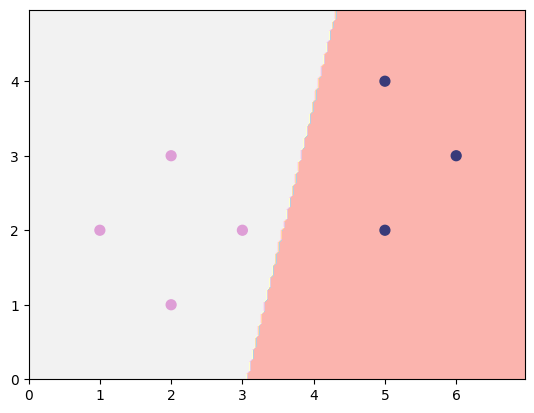

In [122]:
w = lr_train(seven_X, seven_y)
print("w = {}".format(w))

seven_X_tilde = PolynomialFeatures(1).fit_transform(seven_X)
crossEntropyError = cross_entropy_error(seven_X, seven_y, w)
print("E(w|D) = {}".format(crossEntropyError))

plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [123]:
from sklearn.metrics import zero_one_loss

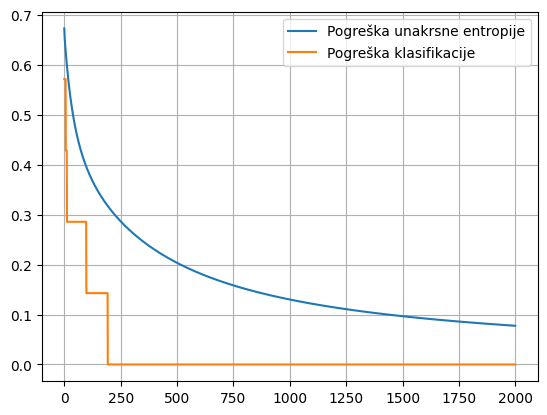

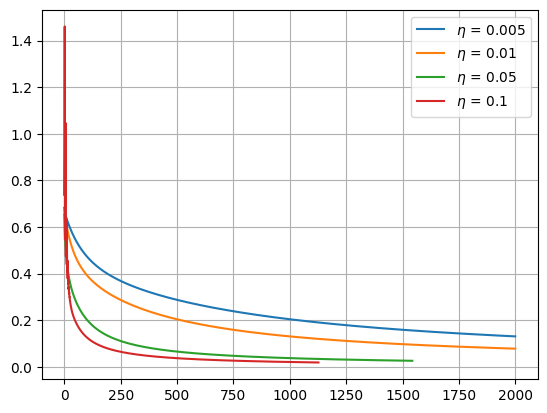

In [124]:
h = []
errors_crossEntropy = []
errors_classification = []

w, w_trace = lr_train(seven_X, seven_y, trace=True)

for w_i in w_trace:
    # Izracunaj pogresku unakrsne entropije za tezine iz svake iteracije.
    errors_crossEntropy.append(cross_entropy_error(seven_X, seven_y, w_i))

    # Iracunaj izlaz funkcije gubitka nula-jedan za svaku iteraciju.
    h.append(sigm(np.sum(w_i.T * PolynomialFeatures(1).fit_transform(seven_X), axis=1)) >= 0.5)

for h_i in h:
    # Dodaj gubitak nula-jedan za svaku iteraciju u listu.
    errors_classification.append(zero_one_loss(seven_y, h_i))

plt.plot(errors_crossEntropy, label="Pogreška unakrsne entropije")
plt.plot(errors_classification, label="Pogreška klasifikacije")

plt.legend()
plt.grid()
plt.show()

etas = [0.005, 0.01, 0.05, 0.1]

for eta in etas:
    errors_crossEntropy = []
    w, w_trace = lr_train(seven_X, seven_y, eta=eta, trace=True)
    
    for w_i in w_trace:
        errors_crossEntropy.append(cross_entropy_error(seven_X, seven_y, w_i))
    
    plt.plot(errors_crossEntropy, label="$\u03B7$ = {}".format(eta))

plt.legend()
plt.grid()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

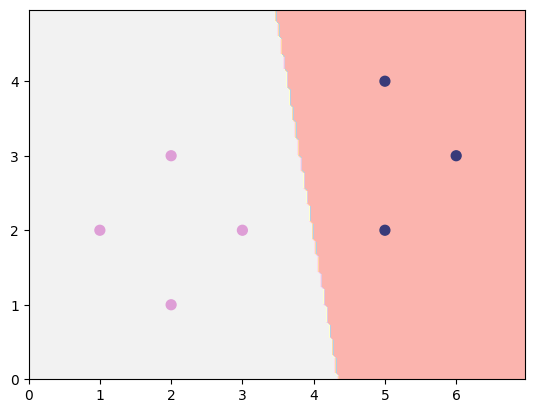

In [127]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(penalty='l2', tol=0.0001, C=100, fit_intercept=True, max_iter=2000)
logisticRegression.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x : logisticRegression.predict(x))

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [2851]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

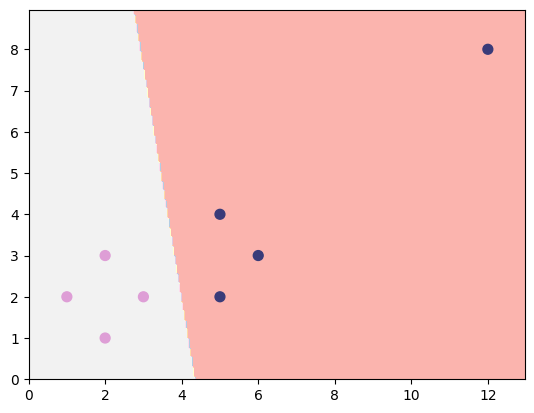

In [2852]:
logisticRegression.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x : logisticRegression.predict(x))

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

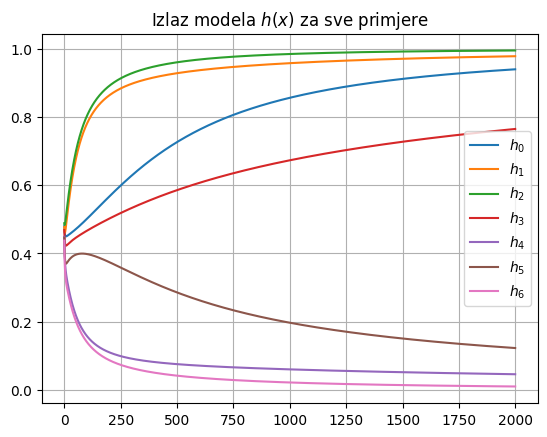

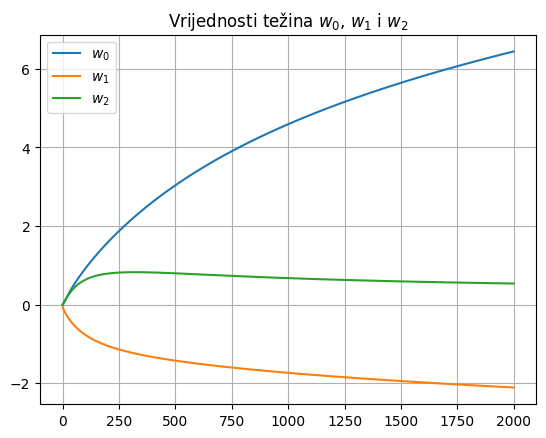

In [2853]:
w, w_trace = lr_train(seven_X, seven_y, trace=True)

predictions = [[] for x in range(seven_X.shape[0])] # Broj primjera
weights = [[] for x in range(w.shape[0])] # Broj znacajki

for w_i in w_trace:
    h = lr_h(seven_X, w_i)
    for i in range(seven_X.shape[0]):
        predictions[i].append(h[i])
    for i in range(w.shape[0]):
        weights[i].append(w_i[i])

for i in range(seven_X.shape[0]):
    plt.plot(range(len(w_trace)), predictions[i], label="$h_{}$".format(i))

plt.title("Izlaz modela $h(x)$ za sve primjere")
plt.legend()
plt.grid()
plt.show()

for i in range(w.shape[0]):
    plt.plot(range(len(w_trace)), weights[i], label="$w_{}$".format(i))

plt.title("Vrijednosti težina $w_0$, $w_1$ i $w_2$")
plt.legend()
plt.grid()
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [2854]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

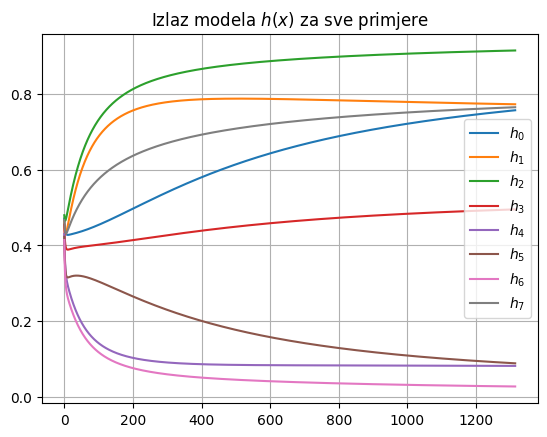

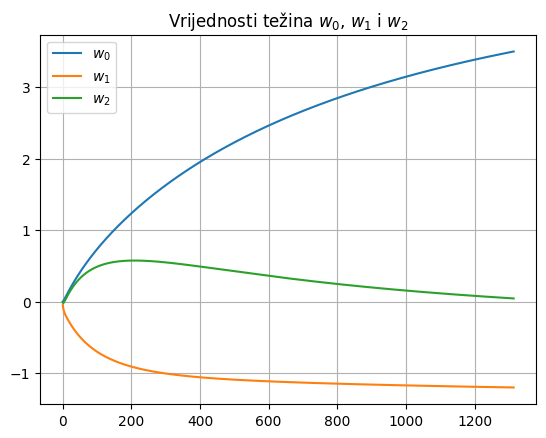

In [2855]:
w, w_trace = lr_train(unsep_X, unsep_y, trace=True)

predictions = [[] for x in range(unsep_X.shape[0])] # Broj primjera
weights = [[] for x in range(w.shape[0])] # Broj znacajki

for w_i in w_trace:
    h = lr_h(unsep_X, w_i)
    for i in range(unsep_X.shape[0]):
        predictions[i].append(h[i])
    for i in range(w.shape[0]):
        weights[i].append(w_i[i])

for i in range(unsep_X.shape[0]):
    plt.plot(range(len(w_trace)), predictions[i], label="$h_{}$".format(i))

plt.title("Izlaz modela $h(x)$ za sve primjere")
plt.legend()
plt.grid()
plt.show()

for i in range(w.shape[0]):
    plt.plot(range(len(w_trace)), weights[i], label="$w_{}$".format(i))

plt.title("Vrijednosti težina $w_0$, $w_1$ i $w_2$")
plt.legend()
plt.grid()
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [2856]:
from numpy.linalg import norm

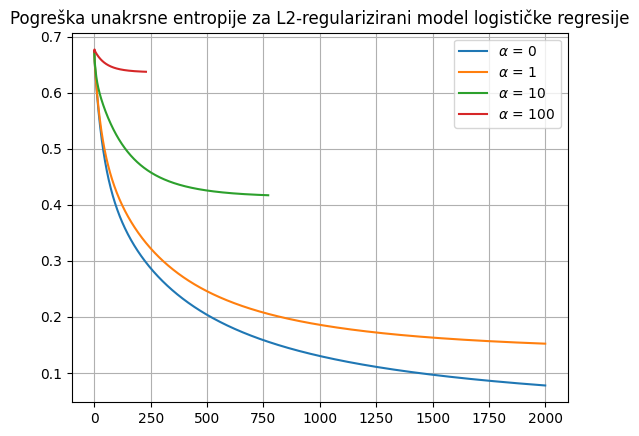

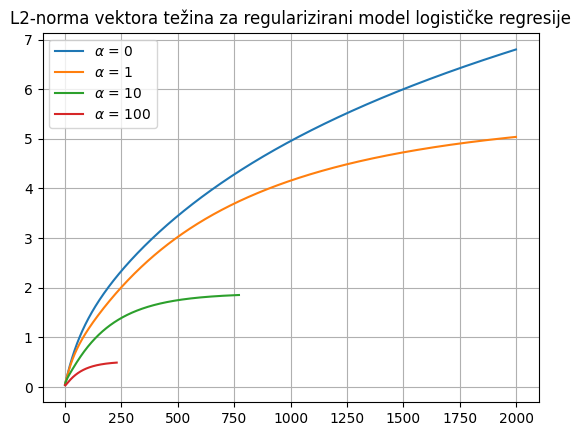

In [2857]:
alphas = [0, 1, 10, 100]

for alpha in alphas:
    w, w_trace = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    
    errors_crossEntropy = []
    for w_i in w_trace:
        errors_crossEntropy.append(cross_entropy_error(seven_X, seven_y, w_i))
    plt.plot(errors_crossEntropy, label="$\u03B1$ = {}".format(alpha))

plt.title("Pogreška unakrsne entropije za L2-regularizirani model logističke regresije")
plt.legend()
plt.grid()
plt.show()

for alpha in alphas:
    w, w_trace = lr_train(seven_X, seven_y, alpha=alpha, trace=True)

    norms = []
    for w_i in w_trace:
        norms.append(norm(w_i))
    plt.plot(norms, label = "$\u03B1$ = {}".format(alpha))

plt.title("L2-norma vektora težina za regularizirani model logističke regresije")
plt.legend()
plt.grid()
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [2858]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

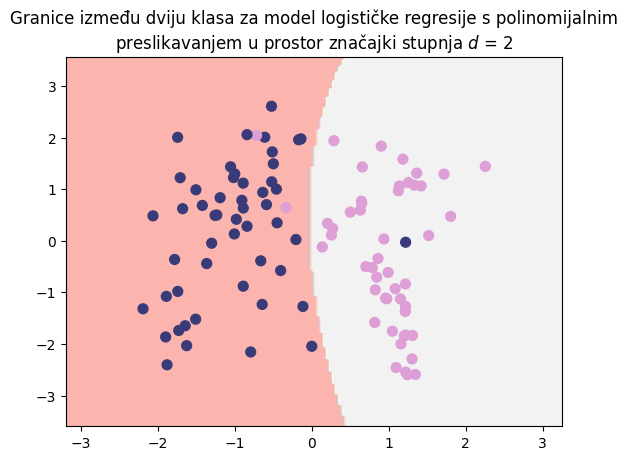

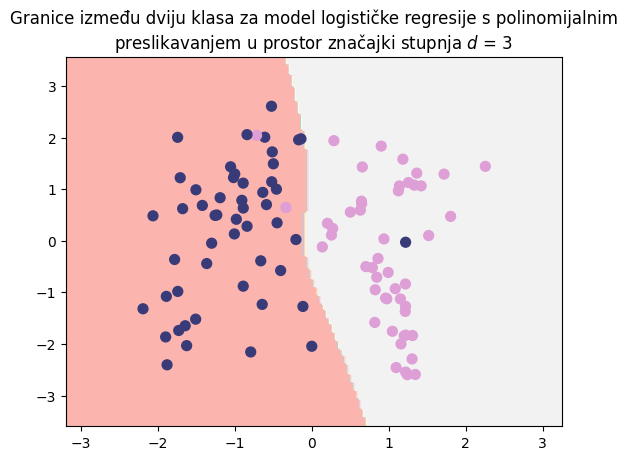

In [2871]:
from sklearn.datasets import make_classification

# X, y = make_classification(n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
# for d in (2, 3):
#     X_tmp = PolynomialFeatures(d).fit_transform(X)
#     model = LogisticRegression(C=10).fit(X_tmp, y)
#     probs = model.predict_proba(X_tmp)
#     plot_2d_clf_problem(X, y, lambda X: model.predict(PolynomialFeatures(d).fit_transform(X)))

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)

for d in range(2, 4):
    X_d = PolynomialFeatures(d).fit_transform(X)

    logisticRegression = LogisticRegression(fit_intercept=False)
    logisticRegression.fit(X_d, y)

    plot_2d_clf_problem(X, y, lambda x : logisticRegression.predict(PolynomialFeatures(d).fit_transform(x)))
    plt.title("Granice između dviju klasa za model logističke regresije s polinomijalnim\npreslikavanjem u prostor značajki stupnja $d$ = {}".format(d))
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?